In [1]:
!pip install -q feature_engine


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install shap

   -------------------------------------- 450.3/450.3 kB 402.2 kB/s eta 0:00:00
   ---------------------------------------- 2.7/2.7 MB 204.5 kB/s eta 0:00:00
   ---------------------------------------- 28.1/28.1 MB 180.7 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install catboost

   -------------------------------------- 101.0/101.0 MB 461.2 kB/s eta 0:00:00
   ---------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00
   ---------------------------------------- 15.7/15.7 MB 86.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import shap
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostClassifier
from feature_engine.encoding import RareLabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

pd.set_option('display.max_rows', 1000)

In [6]:
df = pd.read_csv("C:/Users/pentium/Desktop/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv").drop_duplicates()
print(df.shape)
df.sample(5).T

(61352, 20)


,6160,30061,42025,9239,48685
status,Unvalidated,Unvalidated,Unvalidated,Unvalidated,Unvalidated
accident_index,2022010366435,2022010362377,2022471188012,2022061186190,2022501169676
accident_year,2022,2022,2022,2022,2022
accident_reference,010366435,010362377,471188012,061186190,501169676
vehicle_reference,1,1,1,1,1
casualty_reference,1,3,2,1,1
casualty_class,1,2,2,3,1
sex_of_casualty,1,2,2,1,1
age_of_casualty,32,-1,16,41,34
age_band_of_casualty,6,-1,4,7,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,61352.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
vehicle_reference,61352.0,1.450368,1.109855,1.0,1.0,1.0,2.0,227.0
casualty_reference,61352.0,1.333779,0.981507,1.0,1.0,1.0,1.0,148.0
casualty_class,61352.0,1.482299,0.735614,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,61352.0,1.368790,0.534536,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,61352.0,36.670312,19.574357,-1.0,22.0,34.0,50.0,101.0
age_band_of_casualty,61352.0,6.288157,2.463082,-1.0,5.0,6.0,8.0,11.0
casualty_severity,61352.0,2.783039,0.442318,1.0,3.0,3.0,3.0,3.0
pedestrian_location,61352.0,0.800316,2.197167,0.0,0.0,0.0,0.0,10.0
pedestrian_movement,61352.0,0.645325,2.009611,0.0,0.0,0.0,0.0,9.0


In [9]:
df['casualty_severity'].value_counts()

3    48831
2    11731
1      790
Name: casualty_severity, dtype: int64

In [10]:
df['casualty_reference'].value_counts().head(30)

1      47792
2       9305
3       2795
4        934
5        325
6        100
7         37
8         15
9         11
10        10
11         7
12         6
14         4
13         4
15         3
16         2
22         1
148        1
Name: casualty_reference, dtype: int64

In [11]:
!pip install category_encoders


   ---------------------------------------- 81.9/81.9 kB 123.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import category_encoders as ce

# Select main label
main_label = 'is_severe'
df[main_label] = (df['casualty_severity'] < 3).astype(int)

def convert_age(x):
    if x == -1 or x == 'None':
        return 'None'
    try:
        return str(5 * round(1/5 * float(x)))
    except ValueError:
        return 'Invalid Age'

df['age_of_casualty'] = df['age_of_casualty'].apply(convert_age)

# Finally, drop unused columns
cols2drop = ['accident_year', 'status', 'accident_index', 'accident_year', 'casualty_severity',
             'accident_reference', 'age_band_of_casualty', 'lsoa_of_casualty']
df = df.drop(cols2drop, axis=1)

# Define columns to encode
cols_to_encode = ['sex_of_casualty', 'pedestrian_location', 'pedestrian_movement', 'car_passenger',
                  'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_class',
                  'casualty_home_area_type', 'casualty_imd_decile', 'vehicle_reference', 'casualty_reference']

# Initialize encoder
encoder = ce.OrdinalEncoder(cols=cols_to_encode)

# Encode categorical columns
df_encoded = encoder.fit_transform(df)

print(df_encoded.shape)
df_encoded.sample(5).T



(61352, 14)


,36560,51798,44319,44677,12203
vehicle_reference,2,1,2,2,2
casualty_reference,1,1,1,1,1
casualty_class,3,1,1,1,1
sex_of_casualty,2,1,2,2,2
age_of_casualty,15,50,None,40,25
pedestrian_location,2,1,1,1,1
pedestrian_movement,5,1,1,1,1
car_passenger,1,1,1,1,1
bus_or_coach_passenger,1,1,1,1,1
pedestrian_road_maintenance_worker,1,1,1,1,1


In [13]:
# initialize data
y = df[main_label].values.reshape(-1,)
X = df.drop([main_label], axis=1)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30676, 13), (30676, 13), (30676,), (30676,))

In [14]:
from sklearn.utils.class_weight import compute_class_weight
# add class weights to handle imbalanced classes
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print(class_weights)
{0: 0.6282203563383166, 1: 2.449768407}

{0: 0.6282203563383166, 1: 2.4497684076026194}


{0: 0.6282203563383166, 1: 2.449768407}

In [15]:
!pip install catboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from catboost import Pool
# initialize Pool
train_pool = Pool(X_train,
                  y_train,
                  cat_features=cat_cols_idx)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_cols_idx)
# specify the training parameters
model = CatBoostClassifier(iterations=650,
                           depth=5,
                           border_count=20,
                           l2_leaf_reg=0.4,
                           learning_rate=4e-2,
                           class_weights=class_weights,
                           verbose=0)

#train the model
model.fit(train_pool)
# make the prediction using the resulting model
y_train_pred = model.predict_proba(train_pool)[:,1]
y_test_pred = model.predict_proba(test_pool)[:,1]
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print(f"ROC AUC score for train {round(roc_auc_train,4)}, and for test {round(roc_auc_test,4)}")

ROC AUC score for train 0.7181, and for test 0.6882


In [17]:
# calculating the baseline ROC AUC score assuming the same probability from training labels to test
roc_auc_baseline = roc_auc_score(y_test, [np.mean(y_train)]*len(y_test))
print(roc_auc_baseline)

0.5


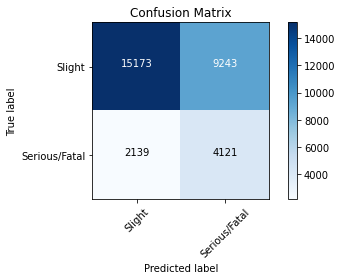

In [18]:
# plotting confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix.

    Parameters:
        cm (array-like): Confusion matrix as returned by sklearn.metrics.confusion_matrix.
        classes (list): List of class names, e.g., ['Class 0', 'Class 1'].
        title (str): Title for the plot.
        cmap (matplotlib colormap): Colormap for the plot.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Get the confusion matrix
cm = confusion_matrix(y_test, (y_test_pred > 0.5))

# Plot the confusion matrix
class_names = ['Slight', 'Serious/Fatal'] # positive class should come the last
plot_confusion_matrix(cm, class_names)

Average severe accident probability is 0.2041


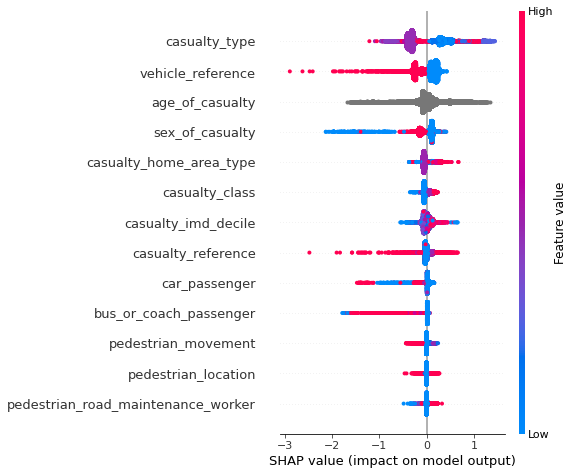

In [19]:
shap.initjs()
ex = shap.TreeExplainer(model)
print(f"Average severe accident probability is {round(np.mean(y_test),4)}")
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=30)



vehicle_reference



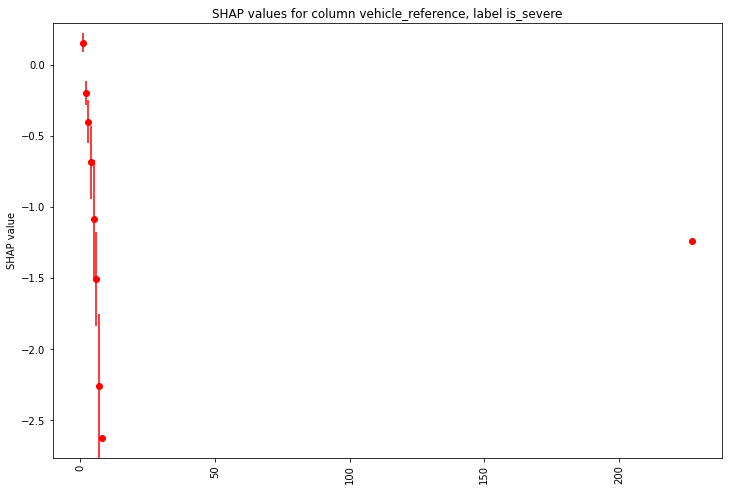

       gain  gain_std  count
col                         
1    0.1547    0.0648  18172
2   -0.1997    0.0851  11600
3   -0.4004    0.1493    736
4   -0.6867    0.2543    114
5   -1.0817    0.4149     36
227 -1.2376       NaN      1
6   -1.5073    0.3301     11
7   -2.2566    0.5079      5
8   -2.6238       NaN      1

casualty_reference



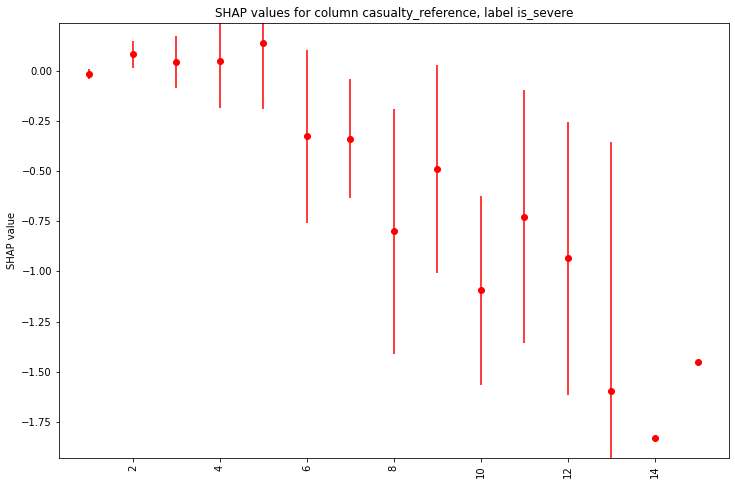

       gain  gain_std  count
col                         
5    0.1395    0.3304    161
2    0.0831    0.0662   4641
4    0.0517    0.2366    478
3    0.0460    0.1292   1403
1   -0.0159    0.0253  23893
6   -0.3248    0.4314     49
7   -0.3379    0.2966     19
9   -0.4887    0.5192      5
11  -0.7268    0.6298      3
8   -0.8005    0.6091     10
12  -0.9353    0.6794      3
10  -1.0941    0.4723      7
15  -1.4496       NaN      1
13  -1.5973    1.2449      2
14  -1.8323       NaN      1

casualty_class



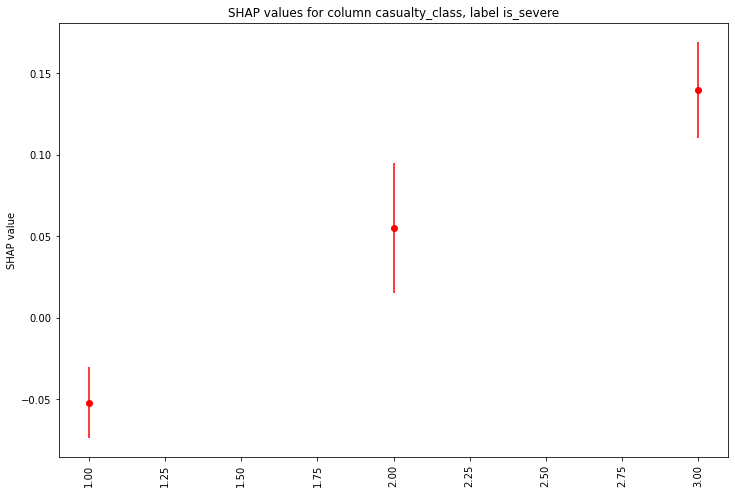

       gain  gain_std  count
col                         
3    0.1398    0.0293   4470
2    0.0550    0.0402   5870
1   -0.0522    0.0216  20336

sex_of_casualty



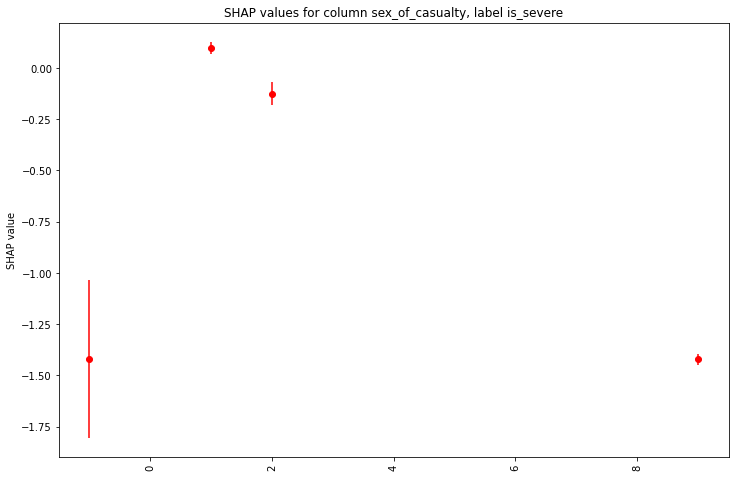

       gain  gain_std  count
col                         
 1   0.0958    0.0296  18711
 2  -0.1244    0.0537  11730
-1  -1.4200    0.3838    232
 9  -1.4223    0.0247      3

age_of_casualty



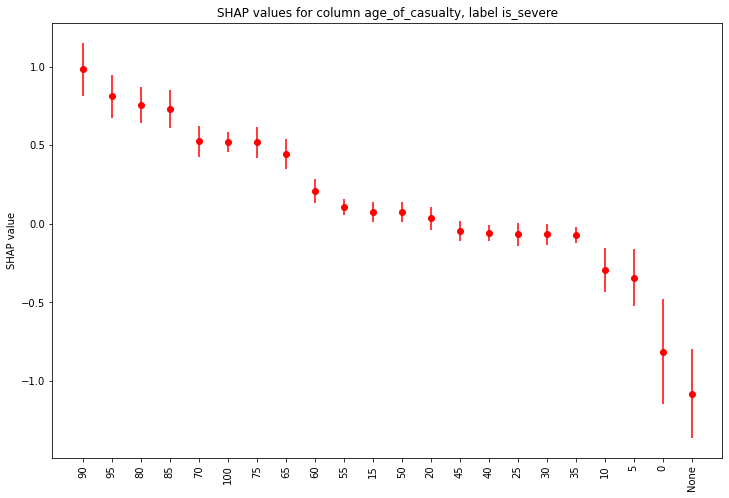

        gain  gain_std  count
col                          
90    0.9830    0.1690    146
95    0.8113    0.1371     23
80    0.7549    0.1155    450
85    0.7289    0.1214    344
70    0.5246    0.0978    753
100   0.5201    0.0660      2
75    0.5177    0.1007    661
65    0.4440    0.0925   1012
60    0.2105    0.0760   1499
55    0.1062    0.0534   1883
15    0.0758    0.0622   1776
50    0.0729    0.0633   1952
20    0.0336    0.0715   3652
45   -0.0462    0.0661   1978
40   -0.0563    0.0507   2467
25   -0.0663    0.0723   3252
30   -0.0678    0.0682   3308
35   -0.0718    0.0519   2885
10   -0.2958    0.1390   1153
5    -0.3439    0.1805    637
0    -0.8134    0.3328    172
None -1.0810    0.2821    671

pedestrian_location



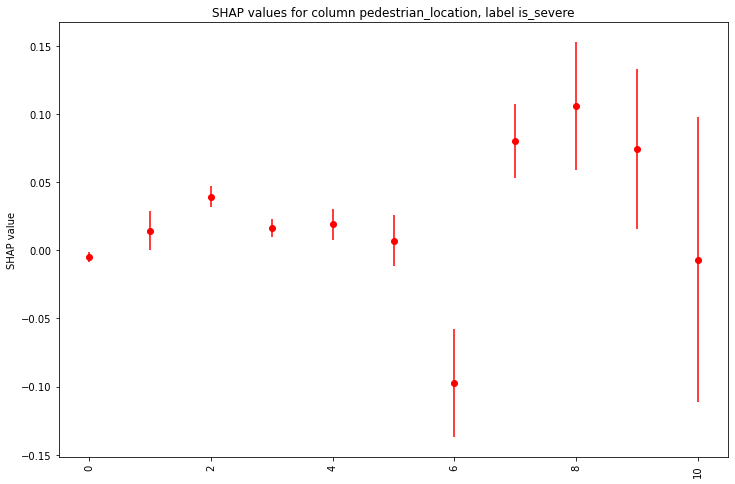

       gain  gain_std  count
col                         
8    0.1057    0.0471    259
7    0.0803    0.0274     35
9    0.0743    0.0584    477
2    0.0394    0.0077     21
4    0.0191    0.0113    274
3    0.0164    0.0069     14
1    0.0144    0.0143    720
5    0.0070    0.0188   1704
0   -0.0050    0.0038  26206
10  -0.0068    0.1046    434
6   -0.0977    0.0396    532

pedestrian_movement



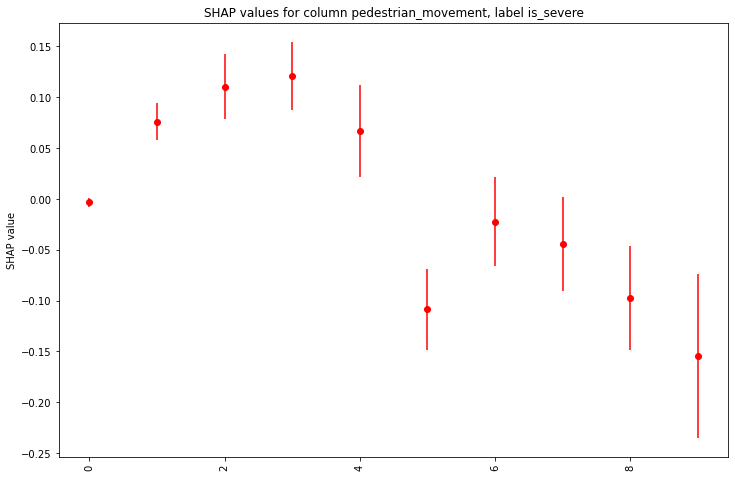

       gain  gain_std  count
col                         
3    0.1205    0.0335    928
2    0.1104    0.0319    210
1    0.0760    0.0185   1409
4    0.0669    0.0454    147
0   -0.0035    0.0046  26205
6   -0.0225    0.0436     36
7   -0.0443    0.0459    115
8   -0.0978    0.0510    106
5   -0.1086    0.0398    236
9   -0.1544    0.0804   1284

car_passenger



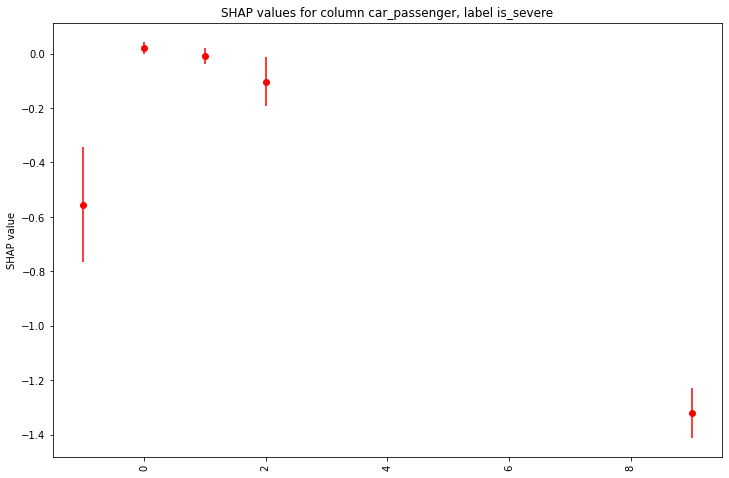

       gain  gain_std  count
col                         
 0   0.0204    0.0212  25598
 1  -0.0077    0.0295   3084
 2  -0.1037    0.0900   1782
-1  -0.5547    0.2110    171
 9  -1.3202    0.0914     41

bus_or_coach_passenger



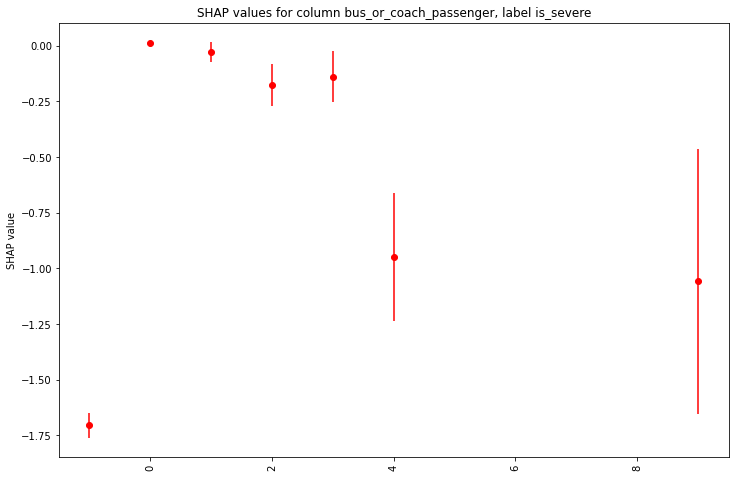

       gain  gain_std  count
col                         
 0   0.0113    0.0042  30246
 1  -0.0277    0.0435     10
 3  -0.1379    0.1127    127
 2  -0.1761    0.0928     32
 4  -0.9494    0.2867    246
 9  -1.0581    0.5967      2
-1  -1.7047    0.0561     13

pedestrian_road_maintenance_worker



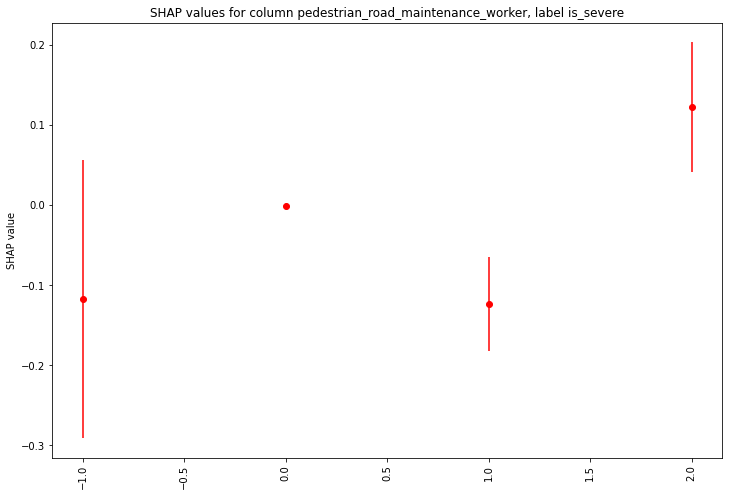

       gain  gain_std  count
col                         
 2   0.1218    0.0809    550
 0  -0.0011    0.0022  30010
-1  -0.1175    0.1732     51
 1  -0.1238    0.0588     65

casualty_type



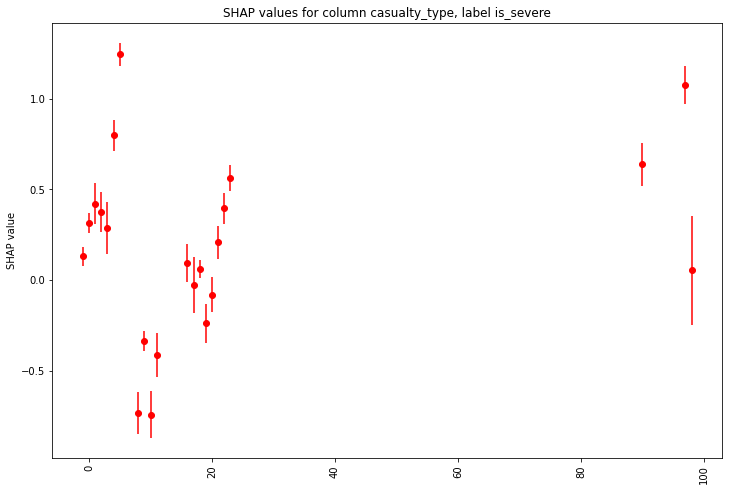

       gain  gain_std  count
col                         
 5   1.2449    0.0638    897
 97  1.0745    0.1036    437
 4   0.7975    0.0857    421
 90  0.6381    0.1177    398
 23  0.5638    0.0715     65
 1   0.4219    0.1114   3548
 22  0.3964    0.0851     56
 2   0.3728    0.1105    230
 0   0.3130    0.0554   4470
 3   0.2890    0.1429   1823
 21  0.2073    0.0902     97
-1   0.1308    0.0533      4
 16  0.0929    0.1056     14
 18  0.0607    0.0474      3
 98  0.0524    0.3025    196
 17 -0.0264    0.1530     13
 20 -0.0806    0.0985     39
 19 -0.2400    0.1086    731
 9  -0.3377    0.0537  16370
 11 -0.4132    0.1193    473
 8  -0.7339    0.1145    345
 10 -0.7424    0.1303     46

casualty_home_area_type



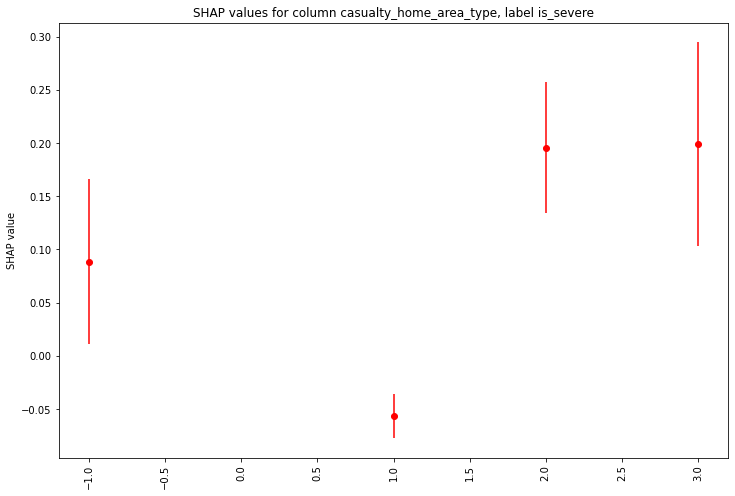

       gain  gain_std  count
col                         
 3   0.1991    0.0955   2974
 2   0.1958    0.0612   2201
-1   0.0886    0.0774   2777
 1  -0.0564    0.0206  22724

casualty_imd_decile



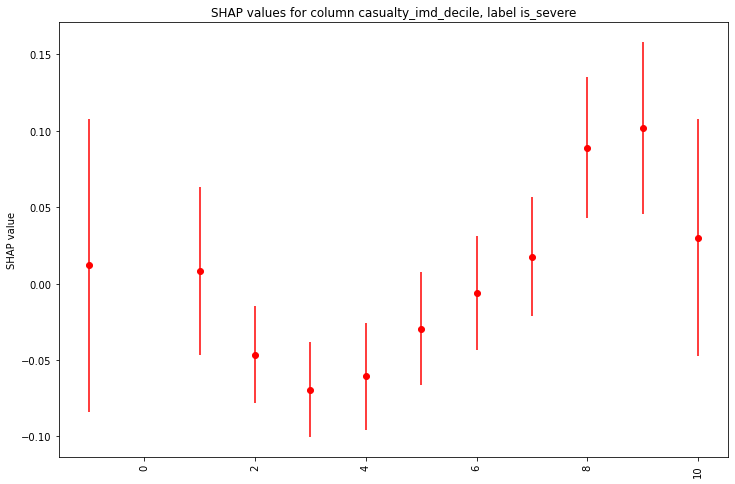

       gain  gain_std  count
col                         
 9   0.1019    0.0562   2022
 8   0.0891    0.0461   2267
 10  0.0301    0.0776   1835
 7   0.0176    0.0389   2493
-1   0.0120    0.0957   2925
 1   0.0084    0.0548   3460
 6  -0.0060    0.0373   2662
 5  -0.0294    0.0372   2887
 2  -0.0465    0.0318   3514
 4  -0.0607    0.0348   3163
 3  -0.0695    0.0311   3448


In [20]:
def show_shap(col, shap_values=shap_values, label=main_label, X_test=X_test, ylabel='SHAP value'):
    df_infl = X_test.copy()
    df_infl['shap_'] = shap_values[:,df_infl.columns.tolist().index(col)]
    gain = round(df_infl.groupby(col).mean()['shap_'],4)
    gain_std = round(df_infl.groupby(col).std()['shap_'],4)
    cnt = df_infl.groupby(col).count()['shap_']
    dd_dict = {'col': list(gain.index), 'gain': list(gain.values), 'gain_std': list(gain_std.values), 'count': cnt}
    df_res = pd.DataFrame.from_dict(dd_dict).sort_values('gain', ascending=False).set_index('col')
    plt.figure(figsize=(12,8))
    plt.errorbar(df_res.index, df_res['gain'], yerr=df_res['gain_std'], fmt="o", color="r")
    plt.title(f'SHAP values for column {col}, label {label}')
    plt.ylabel(ylabel)
    plt.tick_params(axis="x", rotation=90)
    plt.show();
    print(df_res)
    return

for col in X_test.columns:
    print()
    print(col)
    print()
    show_shap(col, shap_values, label=main_label, X_test=X_test)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('C:/Users/pentium/Desktop/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')

In [5]:
df1.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [6]:
print(f"The dataset has {df1.shape[0]} rows and {df1.shape[1]} columns.")

The dataset has 61352 rows and 20 columns.


In [7]:
df1.dtypes

status                                object
accident_index                        object
accident_year                          int64
accident_reference                    object
vehicle_reference                      int64
casualty_reference                     int64
casualty_class                         int64
sex_of_casualty                        int64
age_of_casualty                        int64
age_band_of_casualty                   int64
casualty_severity                      int64
pedestrian_location                    int64
pedestrian_movement                    int64
car_passenger                          int64
bus_or_coach_passenger                 int64
pedestrian_road_maintenance_worker     int64
casualty_type                          int64
casualty_home_area_type                int64
casualty_imd_decile                    int64
lsoa_of_casualty                      object
dtype: object

In [8]:
df1.isnull().sum()

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [9]:
df1.describe(include='all')

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
count,61352,61352,61352.0,61352,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352
unique,1,48283,NaN,48283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23841
top,Unvalidated,2022010356595,NaN,010356595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
freq,61352,16,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8027
mean,NaN,NaN,2022.0,NaN,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674,NaN
std,NaN,NaN,0.0,NaN,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496,NaN
min,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,NaN
50%,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000,NaN
75%,NaN,NaN,2022.0,NaN,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000,NaN


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

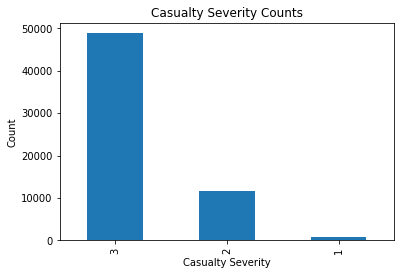

In [11]:
# Let's analyze the 'casualty_severity' column
df1['casualty_severity'].value_counts().plot(kind='bar')
plt.title('Casualty Severity Counts')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.show()

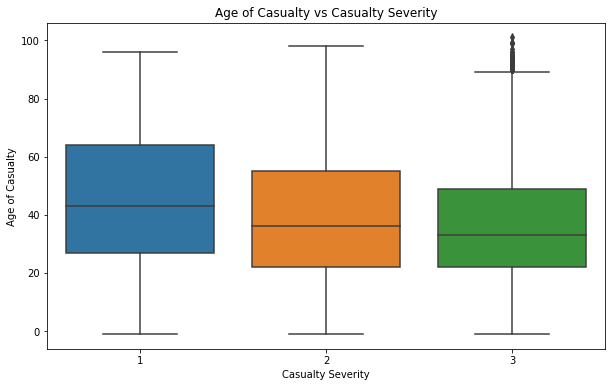

In [12]:
# Let's analyze the relationship between 'casualty_severity' and 'age_of_casualty'
plt.figure(figsize=(10,6))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df1)
plt.title('Age of Casualty vs Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()

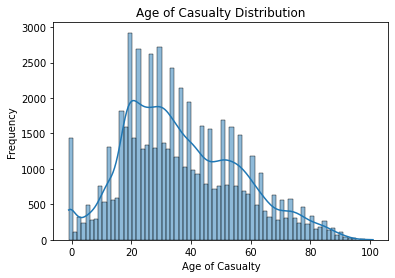

In [13]:
# Let's visualize the distribution of 'age_of_casualty'
sns.histplot(df1['age_of_casualty'], kde=True)
plt.title('Age of Casualty Distribution')
plt.xlabel('Age of Casualty')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
# Selecting relevant features for the model. This can be changed according to the problem at hand.
features = ['accident_year', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']
df1 = df1[features]

In [16]:
df1 = df1[features].copy()

In [17]:
# Label Encoding for categorical variables
le = LabelEncoder()
categorical_features = ['casualty_class', 'sex_of_casualty', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type']
for feature in categorical_features:
    df1[feature] = le.fit_transform(df1[feature])

# Standard Scaling for numerical variables
scaler = StandardScaler()
numerical_features = ['accident_year', 'vehicle_reference', 'casualty_reference', 'age_of_casualty', 'age_band_of_casualty', 'pedestrian_location', 'pedestrian_movement', 'casualty_imd_decile']
for feature in numerical_features:
    df1[feature] = scaler.fit_transform(df1[feature].values.reshape(-1, 1))

df1.head()

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0.0,0.495232,-0.340070,0,2,0.476632,0.695006,3,-0.364252,-0.321122,1,1,1,8,1,1.476134
1,0.0,-0.405793,-0.340070,0,1,-0.340771,-0.116991,3,-0.364252,-0.321122,1,1,1,8,1,-0.740129
2,0.0,-0.405793,-0.340070,0,2,1.089684,1.101005,3,-0.364252,-0.321122,1,1,1,8,1,1.792743
3,0.0,0.495232,1.697629,0,2,2.111437,1.913002,3,-0.364252,-0.321122,1,1,1,8,2,1.792743
4,0.0,1.396258,0.678779,0,1,1.345122,1.101005,3,-0.364252,-0.321122,1,1,1,8,3,0.842916


In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [19]:
X = df1.drop('casualty_severity', axis=1)
y = df1['casualty_severity']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=1000)

In [22]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

Accuracy: 0.7978974818678184
Precision: 0.6367573058231196
Recall: 0.7978974818678184
F1 Score: 0.7082777755824203


c:\Users\pentium\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# 10-fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv=10)

print(f'Cross Validation Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean()}')

Cross Validation Scores: [0.79612125 0.79563233 0.79608802 0.79592502 0.79592502 0.79576202
 0.79592502 0.79592502 0.79592502 0.79592502]
Average CV Score: 0.7959153748396838


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from joblib import Parallel, delayed

In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a base model
rf = RandomForestClassifier()

# Define a function to fit the model with a specific set of hyperparameters
def fit_model(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score, params

# Create a list of all possible combinations of hyperparameters
param_list = list(ParameterGrid(param_grid))

# Fit the model with all combinations of hyperparameters and track progress with tqdm
results = Parallel(n_jobs=-1, verbose=1)(
    delayed(fit_model)(params) for params in tqdm(param_list)
)

# Find the best hyperparameters based on the test score
best_score, best_params = max(results, key=lambda x: x[0])

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

100%|██████████| 16/16 [00:07<00:00,  2.03it/s]


Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7979789748186782


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   18.6s finished


In [29]:
# Import necessary libraries
import joblib

# Save the model to a file
joblib.dump(model, 'model.pkl')

print("Model dumped!")

Model dumped!


In [30]:
# Load the model from the file
best_estimator_from_joblib = joblib.load('model.pkl')

In [31]:
# Define the features used in the model
features_used_in_model = df1.drop('casualty_severity', axis=1).columns.tolist()

# Get coefficients from the model
coefficients = best_estimator_from_joblib.coef_[0]

# Now use 'features_used_in_model' in your DataFrame creation
coefficients_df = pd.DataFrame({
    'Feature': features_used_in_model,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute value of coefficients
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

print(coefficients_df)

                               Feature  Coefficient
1                    vehicle_reference    -0.511869
4                      sex_of_casualty    -0.442478
10              bus_or_coach_passenger    -0.429081
5                      age_of_casualty     0.276430
14                 casualty_imd_decile    -0.140133
7                  pedestrian_location     0.135611
9                        car_passenger     0.125337
13             casualty_home_area_type     0.122054
6                 age_band_of_casualty     0.044346
12                       casualty_type     0.031437
2                   casualty_reference     0.029971
3                       casualty_class    -0.008742
11  pedestrian_road_maintenance_worker     0.007157
8                  pedestrian_movement     0.001197
0                        accident_year     0.000000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    print("Training", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print()


Training Logistic Regression


c:\Users\pentium\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7978974818678184

Training K-Nearest Neighbors
Accuracy: 0.7676635970988509

Training Decision Tree
Accuracy: 0.6991280254258007

Training Random Forest
Accuracy: 0.7605737103740526

Training Support Vector Machine
Accuracy: 0.7979789748186782



In [33]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each model
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [3, 5, 7, None]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and tune each model
for name, model in models.items():
    print("Tuning", name)
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print()


Tuning Logistic Regression


c:\Users\pentium\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pentium\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Best hyperparameters: {'C': 0.001}
Accuracy: 0.7979789748186782

Tuning K-Nearest Neighbors
Best hyperparameters: {'n_neighbors': 9}
Accuracy: 0.7873033982560509

Tuning Decision Tree
Best hyperparameters: {'max_depth': 5}
Accuracy: 0.7978159889169587

Tuning Random Forest
Best hyperparameters: {'n_estimators': 200}
Accuracy: 0.7636704425067232

Tuning Support Vector Machine



KeyboardInterrupt



In [ ]:
import matplotlib.pyplot as plt

# Store accuracies
accuracies = []

# Train and tune each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models After Hyperparameter Tuning')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()


c:\Users\pentium\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and test sets
# Perform any necessary preprocessing such as scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the architecture for the moderately complex neural network
model1 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the moderately complex model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the moderately complex model
history1 = model1.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Define the architecture for the deep neural network
model2 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the deep model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the deep model
history2 = model2.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate both models on the test set
test_loss1, test_acc1 = model1.evaluate(X_test_scaled, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test_scaled, y_test)

print('Moderately complex model accuracy:', test_acc1)
print('Deep model accuracy:', test_acc2)

# Visualize training history for both models
plt.plot(history1.history['accuracy'], label='Moderately complex accuracy')
plt.plot(history1.history['val_accuracy'], label='Moderately complex val_accuracy')
plt.plot(history2.history['accuracy'], label='Deep accuracy')
plt.plot(history2.history['val_accuracy'], label='Deep val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


c:\Users\pentium\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
pip install xgboost

Epoch 1/50


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define hyperparameters grid for AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create AdaBoost model
ada_boost_model = AdaBoostClassifier()

# Perform GridSearchCV
ada_grid_search = GridSearchCV(ada_boost_model, ada_param_grid, cv=5)
ada_grid_search.fit(X_train, y_train)

# Get the best parameters
best_ada_params = ada_grid_search.best_params_

# Train the model with best parameters
ada_best_model = AdaBoostClassifier(**best_ada_params)
ada_best_model.fit(X_train, y_train)

# Evaluate the model
ada_best_accuracy = ada_best_model.score(X_test, y_test)


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

# Create XGBoost model
xgb_model = xgb.XGBClassifier()

# Perform GridSearchCV
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters
best_xgb_params = xgb_grid_search.best_params_

# Train the model with best parameters
xgb_best_model = xgb.XGBClassifier(**best_xgb_params)
xgb_best_model.fit(X_train, y_train)

# Evaluate the model
xgb_best_accuracy = xgb_best_model.score(X_test, y_test)
